### Import Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
import datetime as dt
from sklearn.preprocessing import StandardScaler

### Import Data and Pre-process it

In [3]:
# Load data 
data = pd.read_csv("mlfactor_long_short.csv")

# Show dataframe
print(data.shape)
data

(268479, 97)


stock_id        date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
0             13  2006-12-31          0.25         0.33         0.27   
1             13  2007-01-31          0.25         0.32         0.28   
2             13  2007-02-28          0.26         0.30         0.30   
3             17  2015-03-31          0.73         0.64         0.70   
4             17  2015-04-30          0.72         0.62         0.66   
...          ...         ...           ...          ...          ...   
268474      1205  2004-05-31          0.97         0.97         0.98   
268475      1205  2004-07-31          0.97         0.96         0.98   
268476      1205  2004-08-31          0.97         0.96         0.97   
268477      1205  2004-09-30          0.97         0.96         0.97   
268478       292  2000-04-30          0.41         0.63         0.52   

        Asset_Turnover  Bb_Yld    Bv  Capex_Ps_Cf  Capex_Sales  ...  \
0                 0.22    0.33  0.01         0.13         0.84  ...   
1                 0.22    0.40  0.01         0.13         0.84  ...   
2                 0.22    0.15  0.01         0.13         0.84  ...   
3                 0.40    0.47  0.01         0.70         0.74  ...   
4                 0.40    0.46  0.01         0.70         0.74  ...   
...                ...     ...   ...          ...          ...  ...   
268474            0.19    0.74  1.00         0.54         0.90  ...   
268475            0.19    0.75  1.00         0.53         0.90  ...   
268476            0.19    0.75  1.00         0.53         0.90  ...   
268477            0.18    0.93  1.00         0.52         0.90  ...   
268478            0.60    0.86  0.50         0.37         0.37  ...   

        Tev_Less_Mktcap  Tot_Debt_Rev  Total_Capital  Total_Debt  \
0                  0.26          0.85           0.02        0.27   
1                  0.26          0.85           0.02        0.27   
2                  0.24          0.85           0.02        0.27   
3                  0.81          0.69           0.40        0.75   
4                  0.80          0.69           0.40        0.75   
...                 ...           ...            ...         ...   
268474             0.99          0.83           0.99        0.99   
268475             0.99          0.83           0.99        0.99   
268476             0.99          0.83           0.99        0.99   
268477             0.99          0.83           0.99        0.99   
268478             0.23          0.34           0.06        0.18   

        Total_Debt_Capital  Total_Liabilities_Total_Assets  Vol1Y_Usd  \
0                     1.00                            0.92       0.84   
1                     1.00                            0.92       0.84   
2                     1.00                            0.92       0.87   
3                     1.00                            1.00       1.00   
4                     1.00                            1.00       1.00   
...                    ...                             ...        ...   
268474                0.57                            0.59       0.34   
268475                0.58                            0.60       0.29   
268476                0.58                            0.60       0.27   
268477                0.57                            0.60       0.26   
268478                0.28                            0.18       0.97   

        Vol3Y_Usd  R1M_Usd  R1M_Usd_C  
0            0.88    0.089        1.0  
1            0.88    0.039        1.0  
2            0.88   -0.012        0.0  
3            0.99    0.174        1.0  
4            0.99   -0.106        0.0  
...           ...      ...        ...  
268474       0.63   -0.029        0.0  
268475       0.64    0.028        1.0  
268476       0.64    0.011        0.0  
268477       0.66    0.045        1.0  
268478       0.96   -0.356        0.0  

[268479 rows x 97 columns]

In [6]:
data['date'] = pd.to_datetime(data['date'])
data = data[data['date'].dt.year < 2008]

/var/folders/79/6xh3y3cd7kl6qqpcykmzhz8r0000gn/T/ipykernel_7021/3206184886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'])


In [7]:
print(data.shape)
data.tail()

(113304, 97)


stock_id       date  Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  \
268474      1205 2004-05-31          0.97         0.97         0.98   
268475      1205 2004-07-31          0.97         0.96         0.98   
268476      1205 2004-08-31          0.97         0.96         0.97   
268477      1205 2004-09-30          0.97         0.96         0.97   
268478       292 2000-04-30          0.41         0.63         0.52   

        Asset_Turnover  Bb_Yld   Bv  Capex_Ps_Cf  Capex_Sales  ...  \
268474            0.19    0.74  1.0         0.54         0.90  ...   
268475            0.19    0.75  1.0         0.53         0.90  ...   
268476            0.19    0.75  1.0         0.53         0.90  ...   
268477            0.18    0.93  1.0         0.52         0.90  ...   
268478            0.60    0.86  0.5         0.37         0.37  ...   

        Tev_Less_Mktcap  Tot_Debt_Rev  Total_Capital  Total_Debt  \
268474             0.99          0.83           0.99        0.99   
268475             0.99          0.83           0.99        0.99   
268476             0.99          0.83           0.99        0.99   
268477             0.99          0.83           0.99        0.99   
268478             0.23          0.34           0.06        0.18   

        Total_Debt_Capital  Total_Liabilities_Total_Assets  Vol1Y_Usd  \
268474                0.57                            0.59       0.34   
268475                0.58                            0.60       0.29   
268476                0.58                            0.60       0.27   
268477                0.57                            0.60       0.26   
268478                0.28                            0.18       0.97   

        Vol3Y_Usd  R1M_Usd  R1M_Usd_C  
268474       0.63   -0.029        0.0  
268475       0.64    0.028        1.0  
268476       0.64    0.011        0.0  
268477       0.66    0.045        1.0  
268478       0.96   -0.356        0.0  

[5 rows x 97 columns]

In [8]:
data = data.drop(["stock_id", 'date', 'R1M_Usd', 'R1M_Usd_C'], axis=1)
data.head()

Advt_12M_Usd  Advt_3M_Usd  Advt_6M_Usd  Asset_Turnover  Bb_Yld    Bv  \
0           0.25         0.33         0.27            0.22    0.33  0.01   
1           0.25         0.32         0.28            0.22    0.40  0.01   
2           0.26         0.30         0.30            0.22    0.15  0.01   
30          0.43         0.18         0.28            0.29    0.78  0.01   
31          0.41         0.18         0.23            0.29    0.58  0.01   

    Capex_Ps_Cf  Capex_Sales  Cash_Div_Cf  Cash_Per_Share  ...  Share_Turn_6M  \
0          0.13         0.84         0.13            0.16  ...           0.57   
1          0.13         0.84         0.09            0.16  ...           0.61   
2          0.13         0.84         0.05            0.16  ...           0.63   
30         0.30         0.86         0.35            0.11  ...           0.79   
31         0.30         0.86         0.29            0.11  ...           0.75   

      Ta  Tev_Less_Mktcap  Tot_Debt_Rev  Total_Capital  Total_Debt  \
0   0.05             0.26          0.85           0.02        0.27   
1   0.05             0.26          0.85           0.02        0.27   
2   0.05             0.24          0.85           0.02        0.27   
30  0.14             0.30          0.87           0.16        0.49   
31  0.14             0.33          0.87           0.16        0.49   

    Total_Debt_Capital  Total_Liabilities_Total_Assets  Vol1Y_Usd  Vol3Y_Usd  
0                  1.0                            0.92       0.84       0.88  
1                  1.0                            0.92       0.84       0.88  
2                  1.0                            0.92       0.87       0.88  
30                 1.0                            1.00       0.99       0.97  
31                 1.0                            1.00       0.99       0.97  

[5 rows x 93 columns]

Normalize/scale the data to ensure that later on variance based techniques are normalized. (pretty sure it is pre-scaled)

In [9]:
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Performing preliminary analysis by following this: https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering 

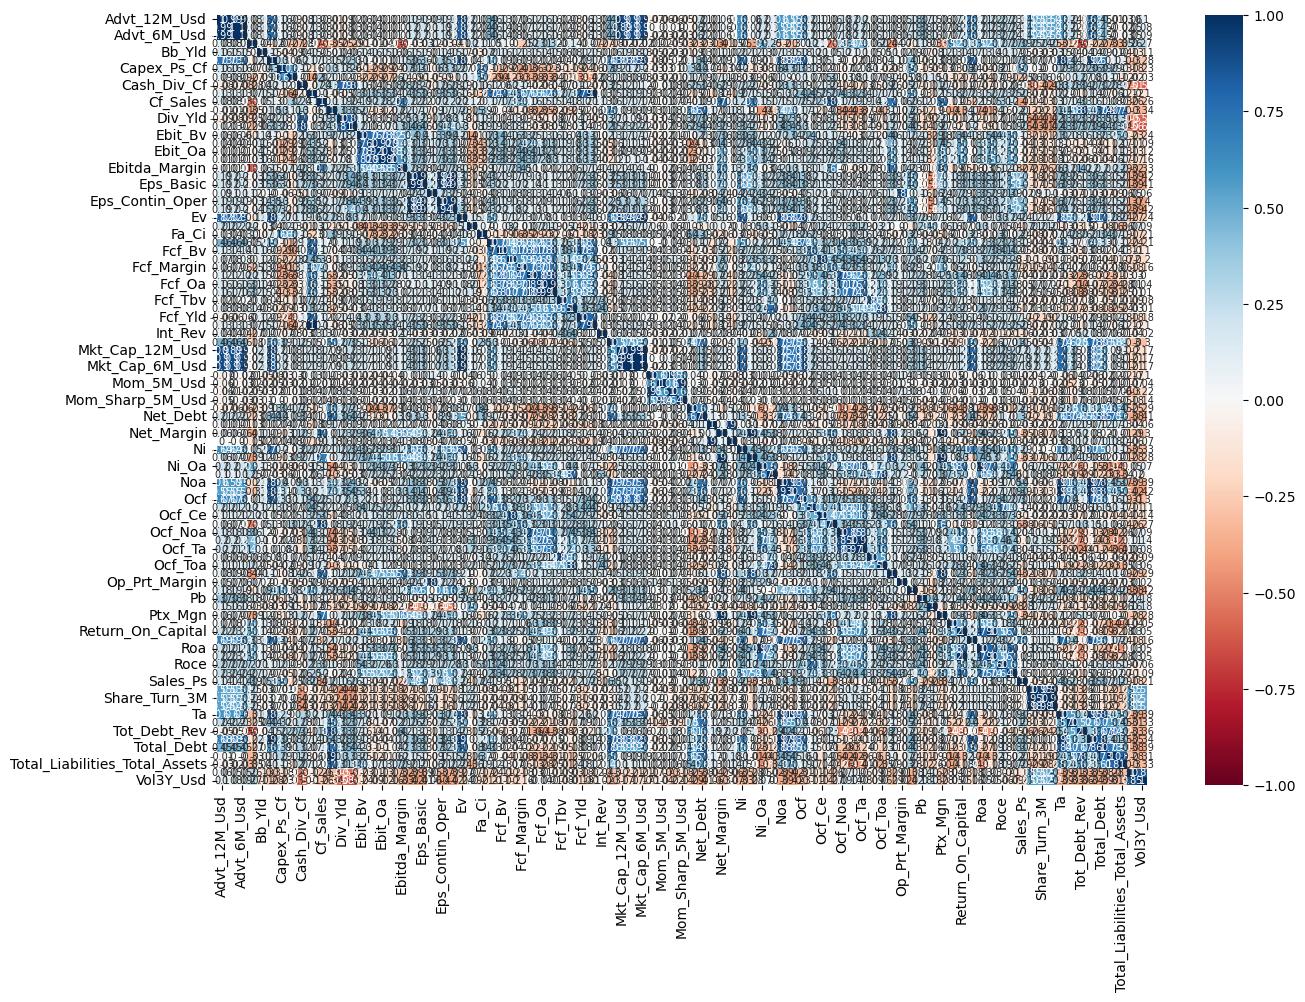

In [10]:
#a mess of a heatmap
plt.figure(figsize=(15,10))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

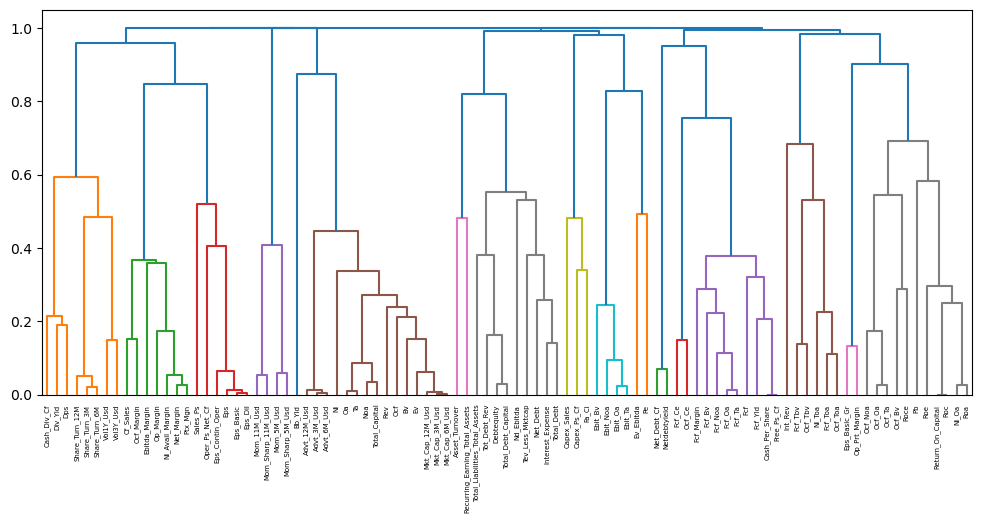

In [11]:
#hierarchical clustering
plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', 
           leaf_rotation=90);

This is actually super cool to look at. Closely correlated entities are closer together with the y-axis showing the distance between them. We see that things like ROC and Return on Capital are very closely related. As well as things related to Eps, the Market Cap, etc. are correlated groups.

In [12]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([ 5,  5,  5,  7,  6,  5,  9,  9,  1, 13,  2,  8,  1,  1, 10, 10, 10,
       10,  2,  3,  3, 15,  3,  3,  5, 11,  9, 13, 13, 13, 13, 13, 13, 13,
       14, 14, 13, 13, 14,  8,  5,  5,  5,  4,  4,  4,  4,  8,  8, 12,  2,
       12,  5,  2, 16, 14,  5,  5,  5, 16, 13,  2, 16, 16, 16, 14, 14,  2,
       15,  3, 16, 11,  2,  7, 16,  5, 16, 16, 16, 16,  3,  1,  1,  1,  5,
        8,  8,  5,  8,  8,  8,  1,  1], dtype=int32)

Feature to cluster labels (5 means that the feature in that index is associated with the 5th cluster where each cluster is designated by the threshold set).

In [13]:
# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(data.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(data[i])
    else:
        df_to_append = pd.DataFrame(data[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

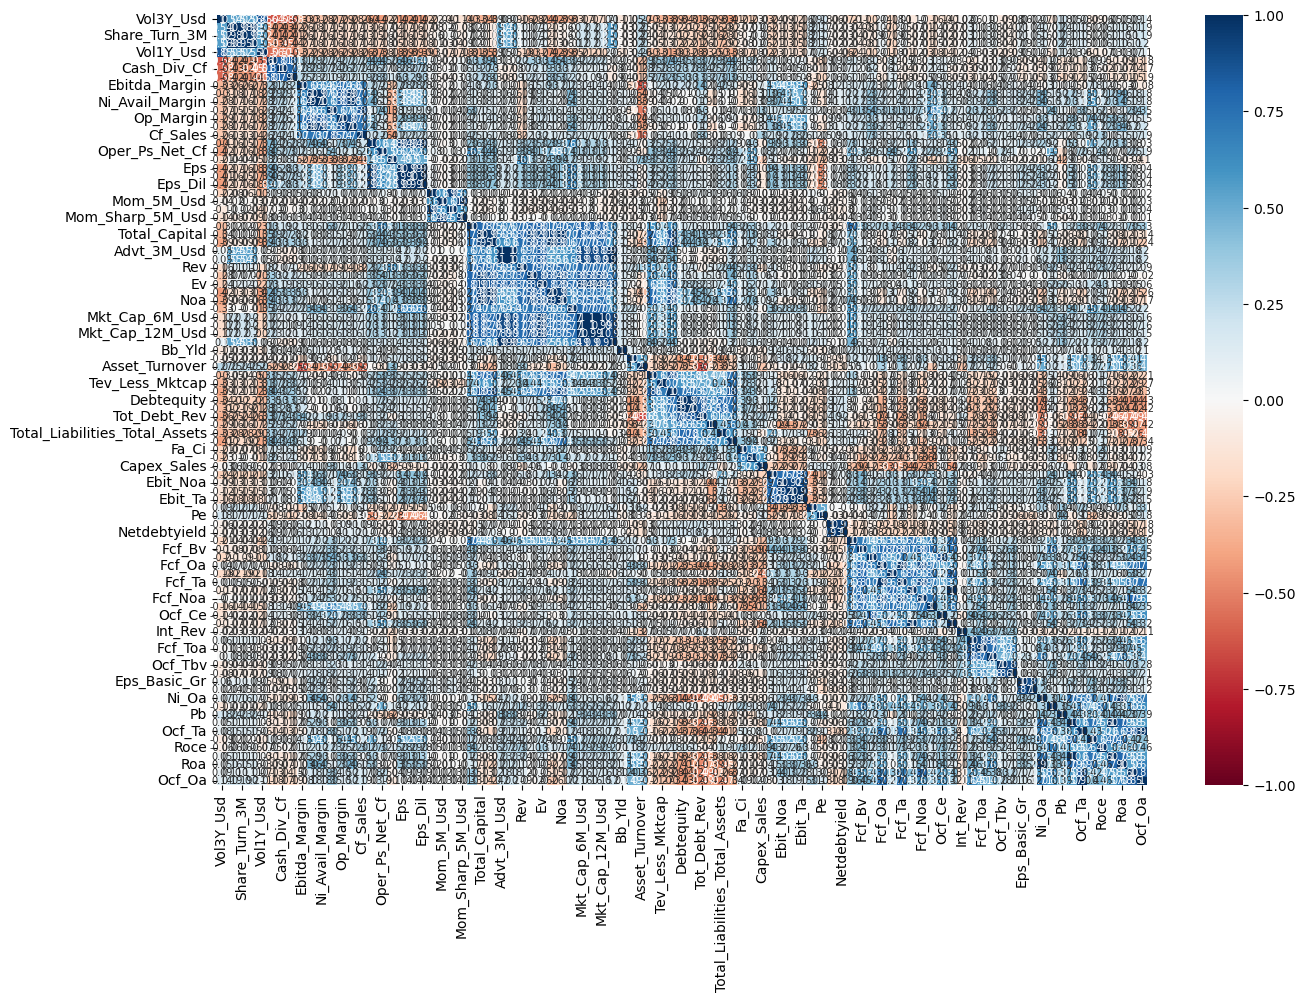

In [14]:
plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

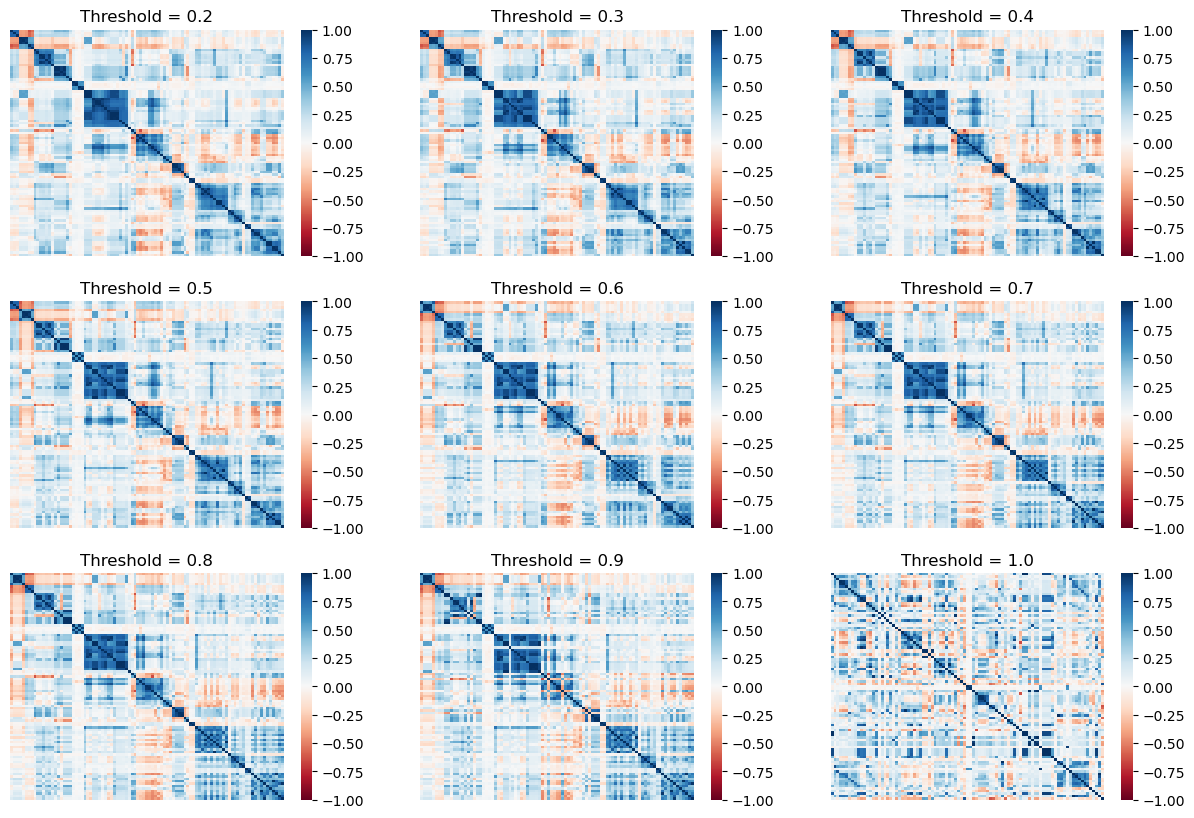

In [18]:
plt.figure(figsize=(15,10))

for idx, t in enumerate(np.arange(0.2,1.1,0.1)):
    
    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)
    
    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(data[i])
        else:
            df_to_append = pd.DataFrame(data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)
            
    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1, 
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))

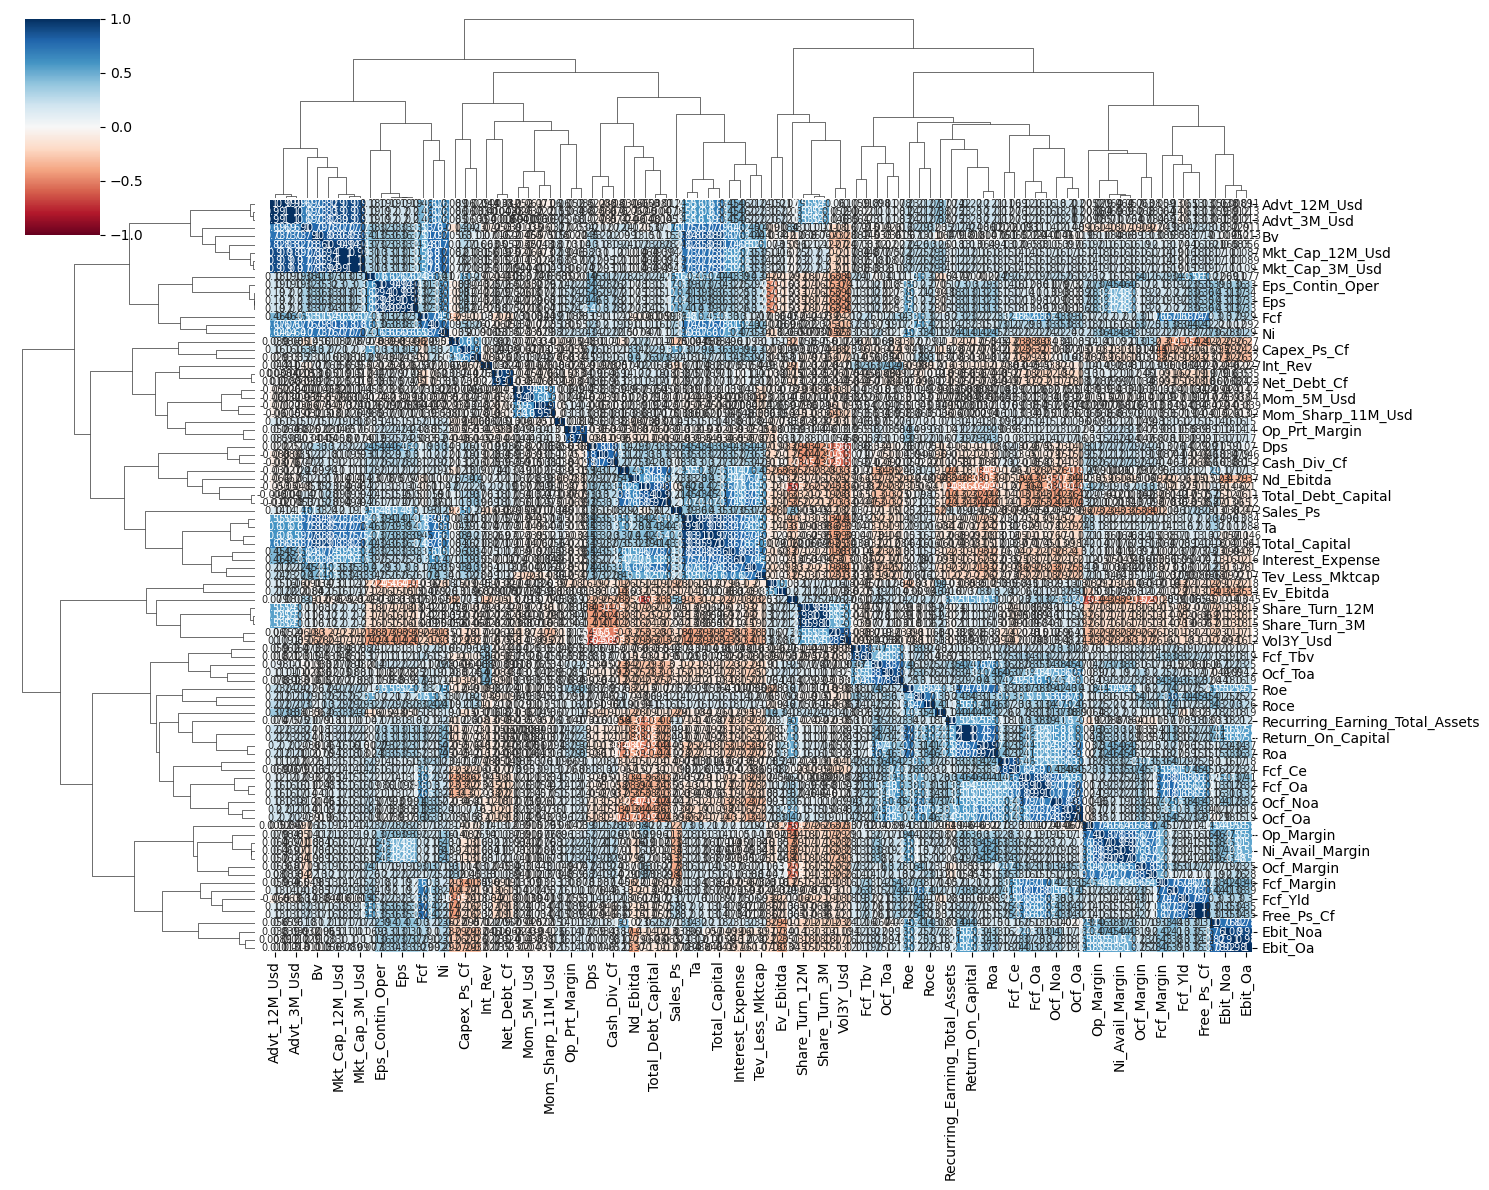

In [19]:
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

Notice 3 larger clusters and 4ish smaller clusters.

### Feature Selection Approach

Here we will adjust the threshold until there are more than 30 groupings (we achieved 33 groupings with a threshold of 0.4). Then we will select the feature with the highest variance from each of the 30+ groupings in order to get the most explained variance in our resulting feature set.

In [20]:
# Clusterize the data
threshold = 0.4
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([10, 10, 10, 13, 12, 11, 18, 19,  1, 25,  4, 15,  1,  1, 20, 20, 20,
       20,  4,  5,  5, 29,  5,  5, 11, 21, 18, 25, 25, 24, 25, 25, 25, 25,
       26, 27, 25, 25, 28, 16, 11, 11, 11,  8,  9,  8,  9, 17, 16, 23,  4,
       23, 11,  4, 32, 27, 11, 11, 11, 31, 24,  4, 30, 30, 30, 26, 27,  4,
       29,  6, 33, 22,  4, 14, 32, 11, 32, 32, 31, 32,  7,  2,  2,  2, 11,
       16, 15, 11, 16, 15, 15,  3,  3], dtype=int32)

Since our data here is scaled, a higher variance might hold more information, so our second selection process will be based on the highest variance in each cluster.

In [15]:
selected_features = []
variances = data.var()

for label_id in np.unique(labels):
    # filter by cluster
    cluster_features = data.columns[labels == label_id]

    # further filtering by the variance 
    highest_variance_feature = variances[cluster_features].idxmax()
    selected_features.append(highest_variance_feature) 

In [16]:
selected_features

['Cash_Div_Cf',
 'Share_Turn_6M',
 'Vol1Y_Usd',
 'Net_Margin',
 'Eps_Dil',
 'Oper_Ps_Net_Cf',
 'Sales_Ps',
 'Mom_11M_Usd',
 'Mom_5M_Usd',
 'Advt_3M_Usd',
 'Ni',
 'Bb_Yld',
 'Asset_Turnover',
 'Recurring_Earning_Total_Assets',
 'Tot_Debt_Rev',
 'Net_Debt',
 'Nd_Ebitda',
 'Capex_Ps_Cf',
 'Capex_Sales',
 'Ebit_Bv',
 'Ev_Ebitda',
 'Pe',
 'Net_Debt_Cf',
 'Fcf_Ce',
 'Fcf_Margin',
 'Fcf_Tbv',
 'Ni_Toa',
 'Int_Rev',
 'Op_Prt_Margin',
 'Ocf_Ta',
 'Ocf_Bv',
 'Ni_Oa',
 'Pb']

Now we will perform a second heatmap to further assess.

In [17]:
reduced_data = data[selected_features]
reduced_data

Cash_Div_Cf  Share_Turn_6M  Vol1Y_Usd  Net_Margin   Eps_Dil  \
0         -1.306202       0.245058   1.184989   -1.708801 -1.641107   
1         -1.448342       0.384213   1.184989   -1.708801 -1.641107   
2         -1.590482       0.453790   1.289340   -1.708801 -1.641107   
3         -0.524431       1.010409   1.706741   -1.674112 -1.606087   
4         -0.737641       0.871255   1.706741   -1.674112 -1.606087   
...             ...            ...        ...         ...       ...   
113299    -0.773176       0.488579  -0.554181   -1.327223 -1.290904   
113300    -1.092992       0.453790  -0.728098   -1.188467 -1.290904   
113301    -0.808711       0.210270  -0.797665   -1.188467 -1.290904   
113302    -0.702106       0.140692  -0.832448   -0.980334 -1.325924   
113303    -1.554947       1.706183   1.637174   -1.465978 -1.501026   

        Oper_Ps_Net_Cf  Sales_Ps  Mom_11M_Usd  Mom_5M_Usd  Advt_3M_Usd  ...  \
0            -1.644146 -1.707606    -1.148016   -1.462059    -0.594895  ...   
1            -1.644146 -1.707606    -1.252279   -1.009963    -0.629613  ...   
2            -1.644146 -1.707606    -0.765716   -0.870857    -0.699049  ...   
3            -1.644146 -1.567620    -1.669333   -1.705495    -1.115663  ...   
4            -1.644146 -1.567620    -1.634579   -1.670719    -1.115663  ...   
...                ...       ...          ...         ...          ...  ...   
113299       -1.222212 -1.322645    -1.148016   -0.905633     1.627049  ...   
113300       -1.222212 -1.357642    -1.252279   -1.288176     1.592331  ...   
113301       -1.222212 -1.357642    -0.835225   -0.523090     1.592331  ...   
113302       -1.187051 -1.392638    -0.904734   -0.001441     1.592331  ...   
113303       -1.573823  0.007219     1.597589    1.737389     0.446641  ...   

          Fcf_Ce  Fcf_Margin   Fcf_Tbv    Ni_Toa   Int_Rev  Op_Prt_Margin  \
0      -1.699960   -1.666053  1.104582 -1.703831  1.139300       0.818888   
1      -1.699960   -1.666053  1.104582 -1.703831  1.139300       0.818888   
2      -1.699960   -1.666053  1.104582 -1.703831  1.139300       0.818888   
3      -1.699960   -1.631389  1.659218 -1.669190 -0.766185       1.627488   
4      -1.699960   -1.631389  1.659218 -1.669190 -0.766185       1.627488   
...          ...         ...       ...       ...       ...            ...   
113299 -1.318817   -1.423407 -0.836644 -1.392061  1.728268       1.517225   
113300 -1.318817   -1.388743 -0.871309 -1.322778  1.728268       0.010288   
113301 -1.318817   -1.388743 -0.871309 -1.322778  1.728268       0.010288   
113302 -1.284168   -1.250089 -0.940638 -1.011008  1.728268       0.010288   
113303 -1.422765   -1.215425 -1.287286 -1.565266 -0.731540       0.010288   

          Ocf_Ta    Ocf_Bv     Ni_Oa        Pb  
0      -1.701930  1.731977 -1.704781  0.010928  
1      -1.701930  1.731977 -1.704781  0.010928  
2      -1.701930  1.731977 -1.704781  0.010928  
3      -1.701930  1.697260 -1.704781  0.010928  
4      -1.701930  1.697260 -1.704781  0.010928  
...          ...       ...       ...       ...  
113299 -1.112886 -1.288383 -1.323465 -0.798404  
113300 -1.078237 -1.253667 -1.323465 -1.150288  
113301 -1.078237 -1.253667 -1.323465 -1.150288  
113302 -0.974288 -1.218950 -1.358130 -1.220665  
113303 -1.528682 -1.496684 -1.531456 -1.537360  

[113304 rows x 33 columns]

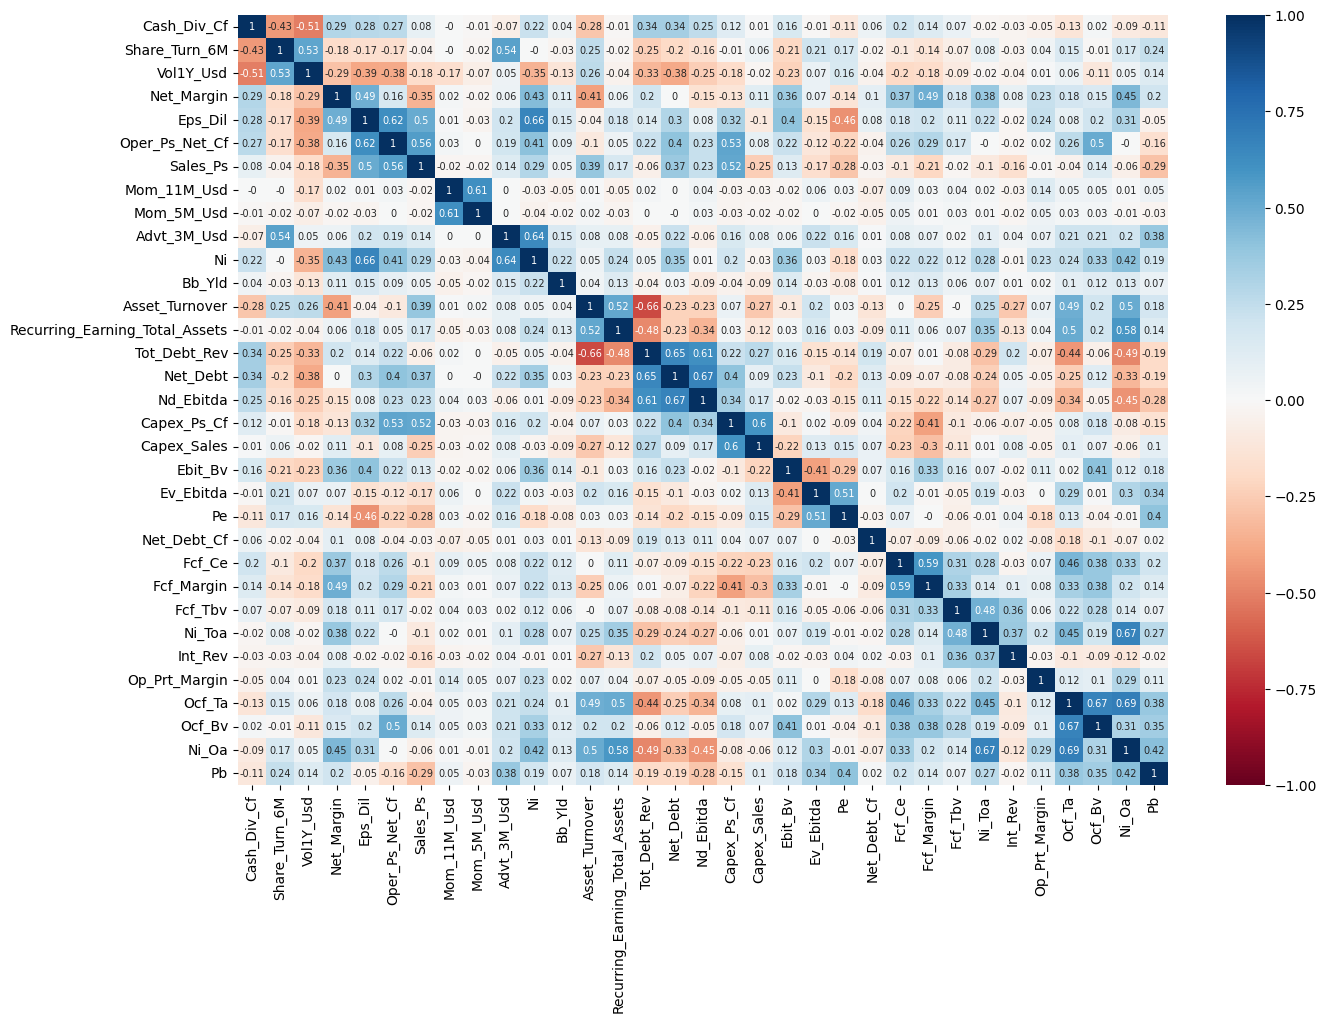

In [18]:
#a mess of a heatmap
plt.figure(figsize=(15,10))
correlations = reduced_data.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

Very limited clustering achieved! Now to create datasets.

In [19]:
df = pd.read_csv("mlfactor_long_short.csv")
df['date'] = pd.to_datetime(df['date'])
df_train_full = df[df['date'].dt.year < 2008]
df_test_full = df[df['date'].dt.year >= 2008]

selected_features_2 = ['stock_id', 'date'] + selected_features + ['R1M_Usd', 'R1M_Usd_C']
df_train = df_train_full[selected_features_2]
df_test = df_test_full[selected_features_2]

df_train.head()

stock_id       date  Cash_Div_Cf  Share_Turn_6M  Vol1Y_Usd  Net_Margin  \
0         13 2006-12-31         0.13           0.57       0.84        0.01   
1         13 2007-01-31         0.09           0.61       0.84        0.01   
2         13 2007-02-28         0.05           0.63       0.87        0.01   
30        29 2002-09-30         0.35           0.79       0.99        0.02   
31        29 2002-10-31         0.29           0.75       0.99        0.02   

    Eps_Dil  Oper_Ps_Net_Cf  Sales_Ps  Mom_11M_Usd  ...  Fcf_Tbv  Ni_Toa  \
0      0.03            0.03      0.01         0.17  ...     0.82    0.01   
1      0.03            0.03      0.01         0.14  ...     0.82    0.01   
2      0.03            0.03      0.01         0.28  ...     0.82    0.01   
30     0.04            0.03      0.05         0.02  ...     0.98    0.02   
31     0.04            0.03      0.05         0.03  ...     0.98    0.02   

    Int_Rev  Op_Prt_Margin  Ocf_Ta  Ocf_Bv  Ni_Oa   Pb  R1M_Usd  R1M_Usd_C  
0      0.83           0.72    0.01    1.00   0.01  0.5    0.089        1.0  
1      0.83           0.72    0.01    1.00   0.01  0.5    0.039        1.0  
2      0.83           0.72    0.01    1.00   0.01  0.5   -0.012        0.0  
30     0.28           0.94    0.01    0.99   0.01  0.5    0.169        1.0  
31     0.28           0.94    0.01    0.99   0.01  0.5    1.239        1.0  

[5 rows x 37 columns]

In [20]:
df_test.head()

stock_id       date  Cash_Div_Cf  Share_Turn_6M  Vol1Y_Usd  Net_Margin  \
3        17 2015-03-31         0.78            1.0        1.0        0.01   
4        17 2015-04-30         0.78            1.0        1.0        0.01   
5        17 2015-05-31         0.78            1.0        1.0        0.01   
6        17 2015-06-30         0.79            1.0        1.0        0.01   
7        17 2015-07-31         0.79            1.0        1.0        0.01   

   Eps_Dil  Oper_Ps_Net_Cf  Sales_Ps  Mom_11M_Usd  ...  Fcf_Tbv  Ni_Toa  \
3     0.01            0.35      0.56         0.01  ...     0.27    0.01   
4     0.01            0.35      0.56         0.01  ...     0.27    0.01   
5     0.01            0.35      0.56         0.01  ...     0.27    0.01   
6     0.01            0.16      0.46         0.01  ...     0.31    0.01   
7     0.01            0.16      0.46         0.01  ...     0.31    0.01   

   Int_Rev  Op_Prt_Margin  Ocf_Ta  Ocf_Bv  Ni_Oa   Pb  R1M_Usd  R1M_Usd_C  
3     0.11           0.01    0.71    0.03   0.01  0.5    0.174        1.0  
4     0.11           0.01    0.71    0.03   0.01  0.5   -0.106        0.0  
5     0.11           0.01    0.71    0.03   0.01  0.5   -0.185        0.0  
6     0.12           0.01    0.48    0.04   0.01  0.5   -0.418        0.0  
7     0.12           0.01    0.48    0.04   0.01  0.5    0.575        1.0  

[5 rows x 37 columns]

In [ ]:
df_train.to_csv('df_train.csv', index=False)
df_test.to_csv('df_test.csv', index=False)